## Task 1: Movie Rating Prediction
Author: Vivekanand Pirsali

Domain: Data Science

Aim: create a data model that predict the rating of a movie accoring to the actor, director and gerne

In [90]:
import numpy as np
import pandas as pd

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [93]:
df_movie = pd.read_csv(r"C:\Users\Vivek Pirsali\OneDrive\Desktop\archive (1)\movies.csv")
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Gerne
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [94]:
df_movie.shape

(3883, 3)

In [95]:
df_movie.describe()

,MovieIDs
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [96]:
df_movie.isna().sum()

MovieIDs     0
MovieName    0
Gerne        0
dtype: int64

##### Rating Dataset

In [97]:
df_rating = pd.read_csv(r"C:\Users\Vivek Pirsali\OneDrive\Desktop\archive (1)\rating.csv")
df_rating.dropna(inplace=True)
df_rating.head()

,UserID,MovieID,Rating,TimeStamps
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [98]:
df_rating.shape

(1000209, 4)

In [99]:
df_rating.describe()

,UserID,MovieID,Rating,TimeStamps
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [100]:
df_rating.isna().sum()

UserID        0
MovieID       0
Rating        0
TimeStamps    0
dtype: int64

#### User Dataset

In [101]:
df_user=pd.read_csv(r"C:\Users\Vivek Pirsali\OneDrive\Desktop\archive (1)\Users.csv")
df_user.dropna(inplace=True)
df_user.head()

,UserId,Gender,Age,Occupation,Zip Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


In [102]:
df_user.shape

(6040, 5)

In [103]:
df_user.describe()

,UserId,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [104]:
df_user.isna().sum()

UserId        0
Gender        0
Age           0
Occupation    0
Zip Code      0
dtype: int64

#### converting the gender data into numerically 

In [105]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_user['Gender']= labelencoder.fit_transform(df_user['Gender'])
df_user.head()

,UserId,Gender,Age,Occupation,Zip Code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,2460
4,5,1,25,20,55455


#### Concatenating the all datasets

In [106]:
df_data = pd.concat([df_rating,df_movie,df_user],axis=1)
df_rating.dropna()
df_data.head()

,UserID,MovieID,Rating,TimeStamps,MovieIDs,MovieName,Gerne,UserId,Gender,Age,Occupation,Zip Code
0,1,1193,5,978300760,1.0,Toy Story (1995),Animation|Children's|Comedy,1.0,0.0,1.0,10.0,48067
1,1,661,3,978302109,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,1.0,56.0,16.0,70072
2,1,914,3,978301968,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,1.0,25.0,15.0,55117
3,1,3408,4,978300275,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,1.0,45.0,7.0,2460
4,1,2355,5,978824291,5.0,Father of the Bride Part II (1995),Comedy,5.0,1.0,25.0,20.0,55455


In [107]:
df_data.shape

(1000209, 12)

In [108]:
df_data.describe()

,UserID,MovieID,Rating,TimeStamps,MovieIDs,UserId,Gender,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,3883.000000,6040.000000,6040.000000,6040.000000,6040.000000
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,1986.049446,3020.500000,0.717053,30.639238,8.146854
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1146.778349,1743.742145,0.450468,12.895962,6.329511
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,982.500000,1510.750000,0.000000,25.000000,3.000000
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,2010.000000,3020.500000,1.000000,25.000000,7.000000
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,2980.500000,4530.250000,1.000000,35.000000,14.000000
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,3952.000000,6040.000000,1.000000,56.000000,20.000000


### Drop Unnecessary Columns

In [109]:
df_data1=df_data.drop(["TimeStamps","Occupation","Zip Code"],axis=1)
df_
df_data1.head()

NameError: name 'df_' is not defined

In [110]:
df_data1.isna().sum()

UserID            0
MovieID           0
Rating            0
MovieIDs     996326
MovieName    996326
Gerne        996326
UserId       994169
Gender       994169
Age          994169
dtype: int64

In [111]:
df_data1.describe()

,UserID,MovieID,Rating,MovieIDs,UserId,Gender,Age
count,1.000209e+06,1.000209e+06,1.000209e+06,3883.000000,6040.000000,6040.000000,6040.000000
mean,3.024512e+03,1.865540e+03,3.581564e+00,1986.049446,3020.500000,0.717053,30.639238
std,1.728413e+03,1.096041e+03,1.117102e+00,1146.778349,1743.742145,0.450468,12.895962
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,0.000000,1.000000
25%,1.506000e+03,1.030000e+03,3.000000e+00,982.500000,1510.750000,0.000000,25.000000
50%,3.070000e+03,1.835000e+03,4.000000e+00,2010.000000,3020.500000,1.000000,25.000000
75%,4.476000e+03,2.770000e+03,4.000000e+00,2980.500000,4530.250000,1.000000,35.000000
max,6.040000e+03,3.952000e+03,5.000000e+00,3952.000000,6040.000000,1.000000,56.000000


#### Droping Missing values

In [112]:
df_finaldata = df_data1.dropna()

In [113]:
df_finaldata.shape

(3883, 9)

## Visualizing the Final Preprocessed Data

<Axes: xlabel='Gender', ylabel='count'>

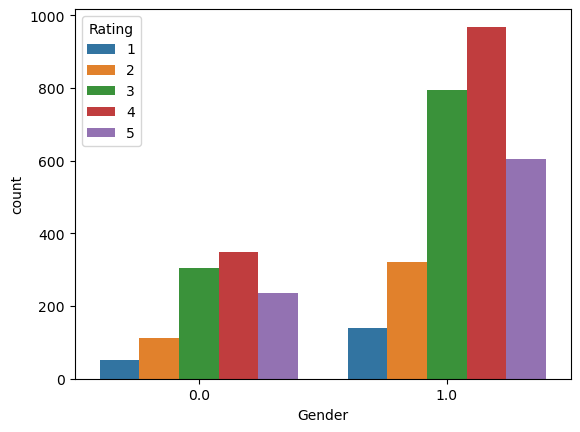

In [114]:
sns.countplot(x=df_finaldata["Gender"], hue=df_finaldata["Rating"])

Text(0.5, 0, 'Rating')

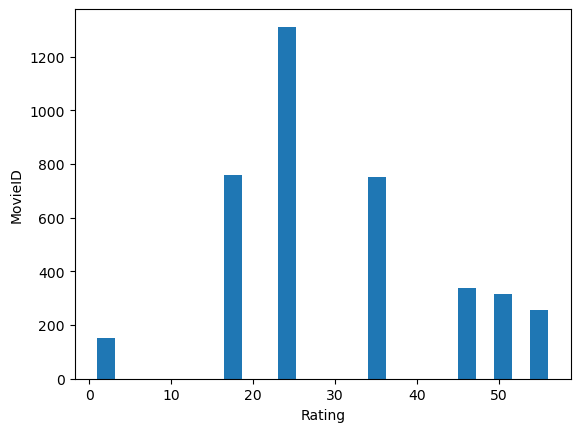

In [115]:
df_finaldata.Age.plot.hist(bins=25)
plt.ylabel("MovieID")
plt.xlabel("Rating")

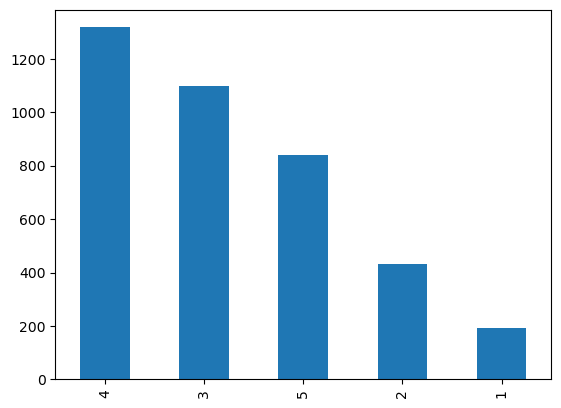

In [116]:
df_finaldata['Rating'].value_counts().plot(kind='bar')
plt.show()

Text(0, 0.5, 'Age')

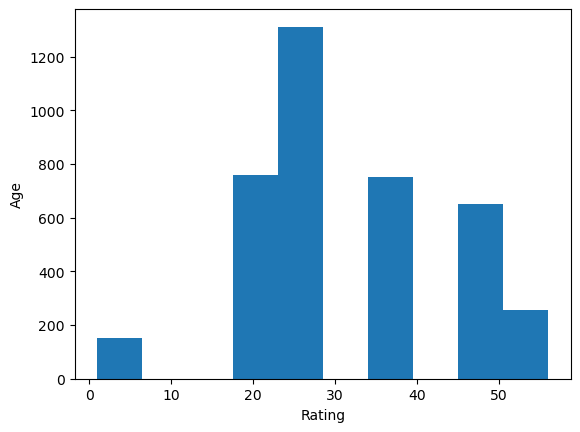

In [117]:
df_finaldata['Age'].plot.hist(bins=10)
plt.xlabel("Rating")
plt.ylabel("Age")

<Axes: xlabel='Age', ylabel='count'>

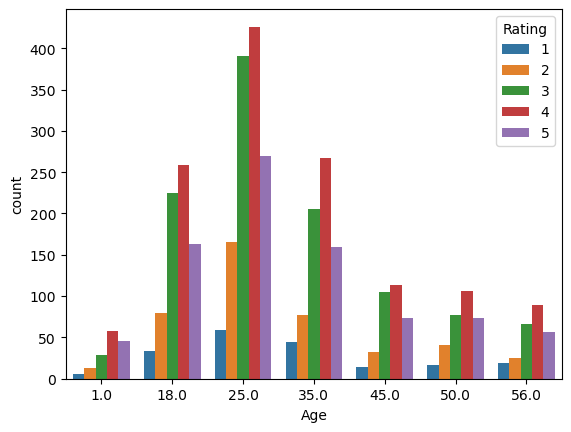

In [118]:
sns.countplot(x=df_finaldata['Age'],hue=df_finaldata['Rating'])

Text(0, 0.5, 'Rating')

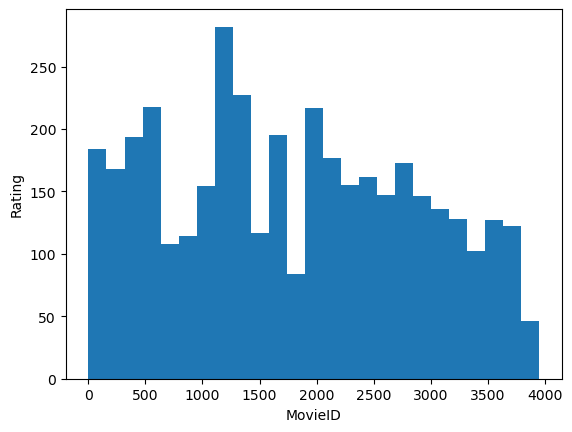

In [119]:
df_finaldata["MovieID"].plot.hist(bins=25)
plt.xlabel("MovieID")
plt.ylabel("Rating")

In [121]:
df_finaldata.head()

,UserID,MovieID,Rating,MovieIDs,MovieName,Gerne,UserId,Gender,Age
0,1,1193,5,1.0,Toy Story (1995),Animation|Children's|Comedy,1.0,0.0,1.0
1,1,661,3,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,1.0,56.0
2,1,914,3,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,1.0,25.0
3,1,3408,4,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,1.0,45.0
4,1,2355,5,5.0,Father of the Bride Part II (1995),Comedy,5.0,1.0,25.0


In [123]:
final=df_finaldata.drop(['MovieIDs','MovieName','Gerne','Rating'],axis=1)
target=df_finaldata['Rating']

In [124]:
target.head()

0    5
1    3
2    3
3    4
4    5
Name: Rating, dtype: int64

In [126]:
final.head()

,UserID,MovieID,UserId,Gender,Age
0,1,1193,1.0,0.0,1.0
1,1,661,2.0,1.0,56.0
2,1,914,3.0,1.0,25.0
3,1,3408,4.0,1.0,45.0
4,1,2355,5.0,1.0,25.0


## Logistic Regression for prediction

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(final)
scaled_df = pd.DataFrame(scaled_data, columns=final.columns)
scaled_df.head()

,UserID,MovieID,UserId,Gender,Age
0,0.0,0.301696,0.000000,0.0,0.000000
1,0.0,0.167046,0.000258,1.0,1.000000
2,0.0,0.231081,0.000515,1.0,0.436364
3,0.0,0.862313,0.000773,1.0,0.800000
4,0.0,0.595799,0.001030,1.0,0.436364


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(final,target,test_size=0.3)

In [131]:
print(Y_train)

734     5
1959    2
3837    5
338     3
2296    3
       ..
1120    4
2352    4
777     4
1764    5
1654    4
Name: Rating, Length: 2718, dtype: int64


In [132]:
print(Y_test)

1389    3
2297    4
864     5
2331    3
493     3
       ..
3871    5
1935    5
3515    3
2871    2
1716    1
Name: Rating, Length: 1165, dtype: int64


In [133]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:
X_test =np.array(X_test)

## Model Prediction 

In [136]:
model.predict(X_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4, 4, 4, ..., 3, 3, 4], dtype=int64)

In [138]:
print(Y_test)

1389    3
2297    4
864     5
2331    3
493     3
       ..
3871    5
1935    5
3515    3
2871    2
1716    1
Name: Rating, Length: 1165, dtype: int64
